<a href="https://colab.research.google.com/github/jai21-7/Introduction-to-Pytorch/blob/main/pytorch_workflow_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Py torch Workflow

let's explore a an example PyTorch end-to-end workflow.

Resources:

* Ground truth notebook-https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb

* Book version of notebook- https://www.learnpytorch.io/01_pytorch_workflow/



In [ ]:
what_were_covering ={
                          1: 'Data (prepare and load)',
                          2: 'Build model',
                          3: 'Fitting the model to data (training)',
                          4: 'Evaluating a model',
                          5: 'Saving and loading a model',
                          6: 'Putting it all together'
}
what_were_covering

{1: 'Data (prepare and load)',
 2: 'Build model',
 3: 'Fitting the model to data (training)',
 4: 'Evaluating a model',
 5: 'Saving and loading a model',
 6: 'Putting it all together'}

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt
#Check pytorch version
torch.__version__

'2.6.0+cu124'

###1. Data (Preparing and loading)

Data can be almost anything... in machine learning.

* Excel speadsheet
* Images of any kind
* Videos ( YouTube has lots of data..)
* Audio like songs or podcasts
* DNA
* Text

Machine learning is a game of two parts:

1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this ,let's create some know data using the linear regression formula.

We'll use a linear regression formula to make a straight line with known parameters.

https://docs.pytorch.org/docs/stable/nn.html

The basic formula for simple linear regression is y = mx + b, where 'y' is the dependent variable, 'x' is the independent variable, 'm' is the slope of the line, and 'b' is the y-intercept. This formula represents a straight line that best fits the relationship between the two variables in a dataset. [1, 2, 3, 4]  
Here's a breakdown:

• y: The predicted value of the dependent variable. [1, 4]  
• x: The independent variable, which is used to predict the value of y. [1, 4]  
• m (slope): Represents the change in y for every one-unit change in x. It indicates the direction and steepness of the line. [4, 5]  
• b (y-intercept): The point where the regression line crosses the y-axis. It represents the value of y when x is zero. [4, 5, 6, 7]  

To find the slope (m) and y-intercept (b) for a specific dataset, you would typically use statistical methods like the least squares method. These methods help determine the line that minimizes the sum of the squared differences between the actual data points and the points predicted by the line. [8, 9, 10, 11]  
For example, if you have data on the amount of rainfall (x) and the amount of crop yield (y), you could use linear regression to find a line that predicts crop yield based on rainfall. The formula for that line would be: yield = m * rainfall + b. [1, 3, 12, 13, 14]  



In [ ]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
Start = 0
end = 1
step = 0.02
X = torch.arange(Start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets (one of the most important concepts in machine learning in general)

Let's create a training and test set with our data.



In [ ]:
#Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)


(40, 40, 10, 10)

https://scikit-learn.org/0.19/modules/generated/sklearn.model_selection.train_test_split.html

How might we better visualize our data?

This is where the data explorer's motto comes in!

"Visualize,visualize,visualize"

In [ ]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data,test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
#Are there Predictions?
  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});


https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

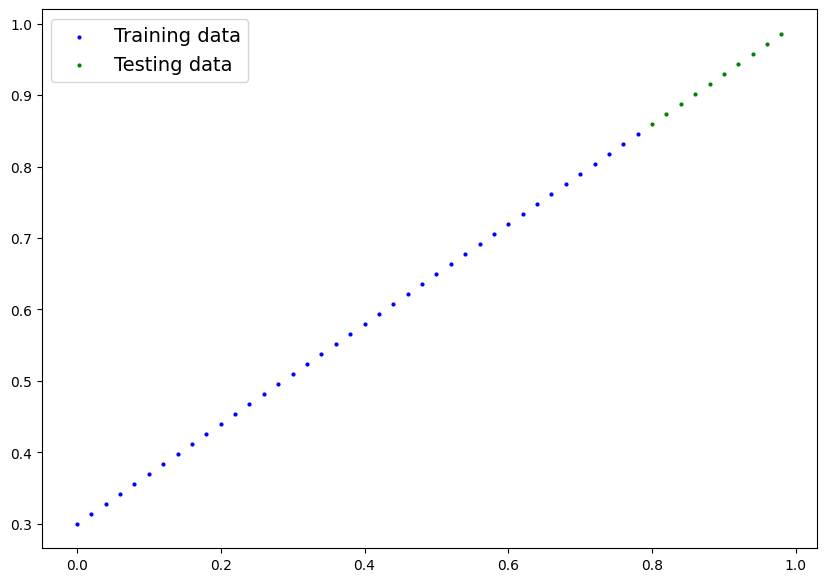

In [ ]:
plot_predictions();

### 2. Build model

Our first PyTorch model!

This is very exciting ... let's do it!

Because we're going to be building classes throughout the course,i'd recommend getting familiar with OOP in Python,to do so you can use the following resources from Real Python:
https://realpython.com/python3-object-oriented-programming/

What our model does:
* Start with random values(weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

How does it do so?

Through two main algorithms:
1. Gradient descent =`SEARCH IT VIDEO ON YOUTUBE`
2. Backpropagation=`SEARCH IT VIDEO ON YOUTUBE`

In [ ]:
from torch import nn

#Create linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherhite from nn.Module
   def __init__(self):
    super().__init__()
   self.weights = nn.Parameter(torch.randn(1,
                                        requires_grad=True,
                                        dtype=torch.float))
   self.bias = nn.Parameter(torch.randn(1,
                                      requires_grad=True,
                                      dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                      requires_grad=True,
                                      dtype=torch.float))

# Forward method to define the computation in the model
def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
    return self.weights * x + self.bias # this is the linear regression formula

IndentationError: unexpected indent (ipython-input-2685147010.py, line 13)

https://docs.pytorch.org/docs/stable/generated/torch.nn.parameter.Parameter.html

https://docs.pytorch.org/docs/stable/generated/torch.nn.Module.html

https://docs.pytorch.org/docs/stable/generated/torch.nn.Module.html

### PyTorch model building essentials

* torch.nn - contains all of the buildings for computational graphs (a neural network can be considered a computational graph)

* torch.nn.Parameter - what parameters should our model try and learn,often a PyTorch layer from torch.nn will set these for us

* torch.nn.Module - The base class for all neural network moules, if you subclass it, you should overwrite forward()

* torch.optim = this where the optimizers in PyTorch live,they will help with gradient descent

* def forward() - All nn.Module subclasses require you to overwrite forward(),this method defines what happens in the forward computation

torch.nn - Contains all of the building blocks for computational graphs (essentially a series of computations executed in a particular way).

torch.nn.Module - The base class for all neural network modules,all the building blocks for neural networks are subclasses. If you're building a neural network in PyTorch, your models should subclass nn.Module. Requires a forward() method be implemented.

torch.optim- Contains various optimization algorithms (these tell the model parameters stored in nn.Parameter how to best change to improve gradient descent and in turn reduce the loss).

torch.utils.data.Dataset - Represents a map between key (label) and sample (features) pairs of your data . Such as images and their associated labels.

torch.utils.data.DataLoader - Creates a Python iterable over a torch Dataset (allows you to iterate over your data).

https://docs.pytorch.org/tutorials/index.html

###Checking the contents of our PyTorch model

Now we've created a model,let's see what's inside...

So we can check our model parameters or what's inside our model using .parameters().

In [ ]:
# Create a random seed
torch.manual_seed(42)

# Create a linear regression model
model_0 = LinearRegressionModel()

model_0

# Check the model parameters
list(model_0.parameters())

In [ ]:
# List name parameters
model_0.state_dict()

Making prediction using torch.inference_mode()

To check our model's predictive power , let's see how well it predict `y_test` based on `x_test`

When we pass data through our model, it's going to run it through the forward the `forward()` method.

In [ ]:
X_test, y_test

In [ ]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

#You can also do something similiar with torch.no_grad(), however, torch.inference_mode() is prefered
  with torch.no.grad():

y_preds

In [ ]:
y_test

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
y_preds = model_0(X_test)
y_preds

## 3. Train Model
The whole idea of training for a model to move from some unknown parameters(these may be random) to some known parameters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your models predictions are is to use a loss function.

* Note : Loss function may also be called cost function or criterion in differnt areas. For our case, we're going to refer to it as a loss function.

Things we need to train:

* ** Loss function:**  A function to measure how wrong your model's predictions are to the ideal outputs, lower is better.

* ** Optimizer:** Takes into account the loss of a model and adjusts the model's parameters(e.g. weight & bias) to improve the loss function.

And specifically for PyTorch ,we need:
* A training loop
* A testing loop

https://docs.pytorch.org/docs/stable/nn.html

In [ ]:
model.parameters()

In [ ]:
list(model_0.parameters())

In [ ]:
# Check out our model's parameters (a parameter is a value that the model sets itself)
model_0.state_dict()

https://docs.pytorch.org/docs/stable/nn.html

https://docs.pytorch.org/docs/stable/generated/torch.nn.L1Loss.html

In [ ]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # lr = learning rate = possibly the most important hyperparameter you can set

In [ ]:
# Set up a loss function
loss_fn = nn.L1Loss()

# Set up an optimizer
optimizer = torch.optim.SGD

https://docs.pytorch.org/docs/stable/generated/torch.optim.SGD.html

In [ ]:
# Setup a loss function
loss_fn = nn.L1Loss()

#Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

https://docs.pytorch.org/docs/stable/optim.html

Q:: Which loss function and optimizer should I use?
A: This will be problem specific. But with experience,you'll get an idea of what works and what doesn't with your particular problem set.

For example, for a regression problem(like ours), a loss function of `nn.L1Loss`
and an optimizer like `torch.optim.SGD()` will suffice.

But for a classification problem like classifying whether a photo is of a dog or a cat, you'll likely want to use a loss function of `nn.BCELoss()`(binary cross entropy loss).

###Building a training loop (and a testing loop)in PyTorch

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()` functions) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss(** gradient descent**)
https://varshithagudimalla.medium.com/concept-of-gradient-descent-algorithm-in-machine-learning-44f587ac16ac

In [ ]:
with torch.inference_mode():
  list(model_0.parameters())

In [ ]:
list(model_0.parameters())

In [ ]:
list(model_0.eval().parameters())

In [ ]:
# An epoch is one loop through the data..
epochs = 1

###Training
# 0. Loop through the data
for epoch in range(epochs):
  #set the model to training mode
  model_0.train()

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Optimizer step
  optimizer.step() # by default how the optimizer changes will acculumate through the loop so.. we have them above in step 3 for the next iteration of the loop
 ### Testing
 model_0.eval() # turns off gradient tracking

https://docs.pytorch.org/docs/stable/nn.html#loss-functions

https://www.youtube.com/watch?v=Nutpusq_AFw

https://www.google.com/search?q=what+is+a+gradient+in+machine+learning&rlz=1C1GCEA_enIN1130IN1130&oq=what+&gs_lcrp=EgZjaHJvbWUqDggAEEUYJxg7GIAEGIoFMg4IABBFGCcYOxiABBiKBTIGCAEQRRg7MgYIAhBFGEAyDAgDEAAYQxiABBiKBTIMCAQQABhDGIAEGIoFMgwIBRAAGEMYgAQYigUyDAgGEAAYQxiABBiKBTIHCAcQABiABNIBCTQ2MzdqMWoxNagCDLACAfEFTxlNmQySx7XxBU8ZTZkMkse1&sourceid=chrome&ie=UTF-8

https://docs.pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html

https://docs.pytorch.org/docs/stable/optim.html

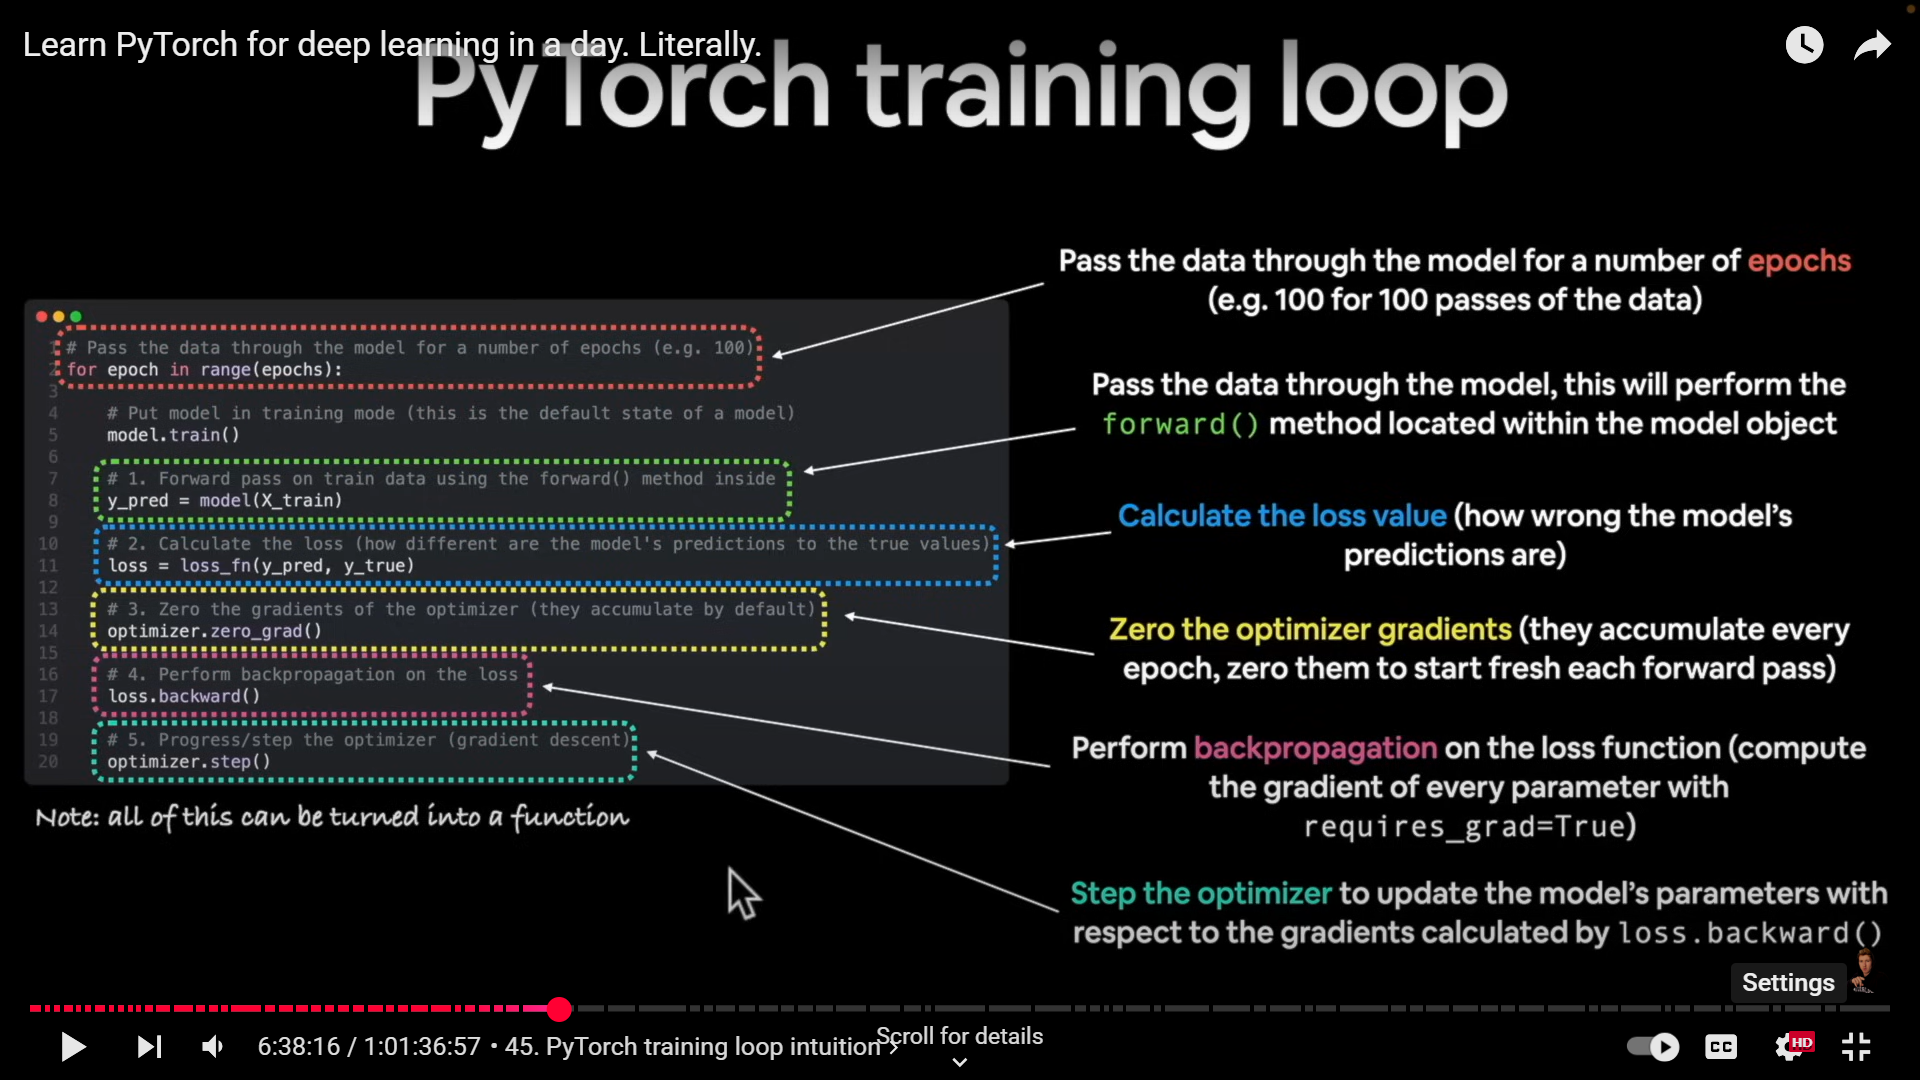

6:41:27